# Objective:
##  Aim to predict the probability of credit default based on the characteristics of credit card owners and their payment history.


#### The target variable is default.payment.next.month, where I am going with 
* 1 indicates credit default.
* 0 indicates no default.

# Step-by-Step Documentation

## Step 1. Import Libraries & Loading dataset

To load essential Python libraries that provide functionalities for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score , precision_score ,recall_score, f1_score,roc_curve, roc_auc_score, f1_score, classification_report, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
## Loading dataset
df = pd.read_csv('C:/161815Project/Final Evaluation/Neetesh_Kumar_Machine Learning/UCI_Credit_Card.csv')

In [3]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

## Step 2. Data Exploration (EDA)

In [4]:
df.shape

(30000, 25)

In [5]:
df.describe() # descriptive Statstics

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [6]:
df.info() # Display dataset structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### lets figure out the given dataset:

30000 customers data and thier payment history. Below are the description of all features we have.

* ID: ID of each customer

* LIMIT_BAL: Limit of Balance allotted to each customer

* SEX: let's consider Gender (1 : male, 2 : female)

* EDUCATION: let's consider (1 : graduate school, 2 : university, 3 : high school, 0,4,5,6 = others)

* MARRIAGE: Marital status (1 = married, 2 = single, 3 = others)

* AGE: Age in years

**PAY_1 to PAY_6** : (0 = No delay (on time), -1 = Payment delay for 1 month, -2 = Payment delay for 2 month and so-on.)

* lets assume last 6 months
  
* PAY_0: Repayment status in Jan.

* PAY_2: Repayment status in Feb.

* PAY_3: Repayment status in Mar.

* PAY_4: Repayment status in Apr.

* PAY_5: Repayment status in May.

* PAY_6: Repayment status in June.

* BILL_AMT1: Amount of bill statement in Jan.

* BILL_AMT2: Amount of bill statement in Feb.

* BILL_AMT3: Amount of bill statement in Mar.

* BILL_AMT4: Amount of bill statement in Apr.

* BILL_AMT5: Amount of bill statement in May.

* BILL_AMT6: Amount of bill statement in June.

* PAY_AMT1: Amount of previous payment in Jan.

* PAY_AMT2: Amount of previous payment in Feb.

* PAY_AMT3: Amount of previous payment in Mar.

* PAY_AMT4: Amount of previous payment in Apr.

* PAY_AMT5: Amount of previous payment in May.

* PAY_AMT6: Amount of previous payment in Jun.

* default.payment.next.month: Default payment (1=Default, 0=No Default)

### Step 2.1 : EDA for Dependent variable

In [7]:
# lets rename the target varaible for our convenience
df['Defaulter'] = df['default.payment.next.month']
df.drop('default.payment.next.month' , axis = 1)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Defaulter  
0           0.0       0.0       0.0       0.0          1  
1        1000.0    1000.0       0.0    2000.0          1  
2        1000.0    1000.0    1000.0    5000.0          0  
3        1200.0    1100.0    1069.0    1000.0          0  
4       10000.0    9000.0     689.0     679.0          0  
...         ...       ...       ...       ...        ...  
29995    5003.0    3047.0    5000.0    1000.0          0  
29996    8998.0     129.0       0.0       0.0          0  
29997   22000.0    4200.0    2000.0    3100.0          1  
29998    1178.0    1926.0   52964.0    1804.0          1  
29999    1430.0    1000.0    1000.0    1000.0          1  

[30000 rows x 25 columns]

**Distribution of Dependent variable**

Defaulter
0    23364
1     6636
Name: count, dtype: int64

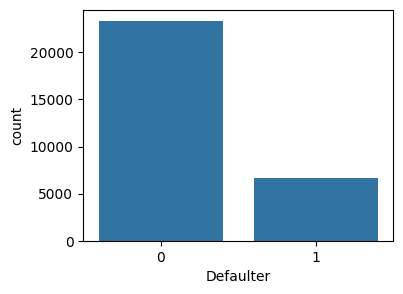

In [8]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'Defaulter', data = df)
df['Defaulter'].value_counts()  # return the number of values of each distinct rows in Dataframe

## It is clear from above graph that both classes are in Disproportion.


## Step 2.2: EDA for Independent variables

* Handling Categorical Variables : 'SEX', 'MARRIAGE', 'EDUCATION'

* from dataset , it can be identified that :
1. SEX:

  ** Male : 1  and  
  ** Female : 2

2. Education:

   ** graduate school :1  
   ** university : 2     
   ** High school : 3 and considering rest categories into Others : 4

3. Marriage:

   ** Single : 2   
   ** Married : 1  
   ** Others : 3  


In [9]:
df['SEX'].value_counts() # it shows that females are having large number than males

SEX
2    18112
1    11888
Name: count, dtype: int64

In [10]:
df['EDUCATION'].value_counts() # as we can see 0,5 and 6 are having very less no. of count so will take those into "Others:4" category.

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [11]:
# converting 0,5 and 6 to 4 
edu = (df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6)
df.loc[edu ,'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [12]:
df['MARRIAGE'].value_counts()   # same here 0 having few no of values so can takr into "Others : 3"

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [13]:
marriage = df['MARRIAGE'] == 0
df.loc[marriage , 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

**Plotting the categorical features**

In [14]:
categorical_features = ['SEX' , 'EDUCATION' , 'MARRIAGE']

In [15]:
df_categorical = df[categorical_features]
df_categorical['IsDefaulter'] = df['Defaulter']  # creating a new column IsDefaulter in category features

C:\Users\mqt\AppData\Local\Temp\ipykernel_6348\2213909249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['IsDefaulter'] = df['Defaulter']  # creating a new column IsDefaulter in category features


In [16]:
# now replaceing numerical values by Categorical values
df_categorical.replace({'SEX':{1 : 'Male' , 2 : 'Female'},
                       'EDUCATION' : {1: 'graduate school' , 2:'university' , 3: 'highscool' , 4 : 'others'},
                           'MARRIAGE' : {1 : 'married' , 2 : 'single' , 3 : 'othres'}} , inplace = True)

C:\Users\mqt\AppData\Local\Temp\ipykernel_6348\875407666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical.replace({'SEX':{1 : 'Male' , 2 : 'Female'},


In [17]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0  ...        0.0        0.0       0.0     689.0       0.0       0.0   
1  ...     3455.0     3261.0       0.0    1000.0    1000.0    1000.0   
2  ...    14948.0    15549.0    1518.0    1500.0    1000.0    1000.0   
3  ...    28959.0    29547.0    2000.0    2019.0    1200.0    1100.0   
4  ...    19146.0    19131.0    2000.0   36681.0   10000.0    9000.0   

   PAY_AMT5  PAY_AMT6  default.payment.next.month  Defaulter  
0       0.0       0.0                           1          1  
1       0.0    2000.0                           1          1  
2    1000.0    5000.0                           0          0  
3    1069.0    1000.0                           0          0  
4     689.0     679.0                           0          0  

[5 rows x 26 columns]

<Figure size 600x300 with 0 Axes>

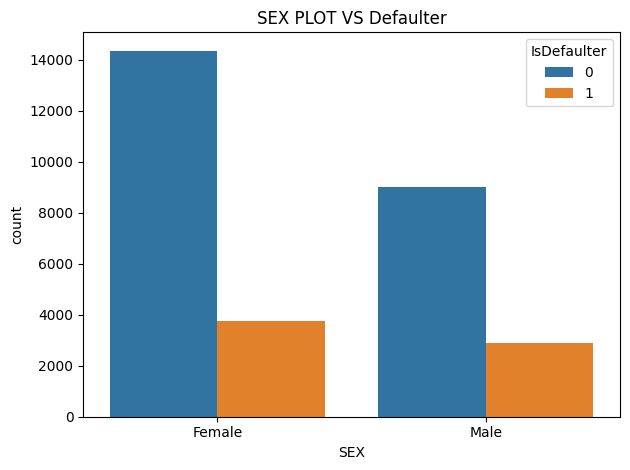

<Figure size 600x300 with 0 Axes>

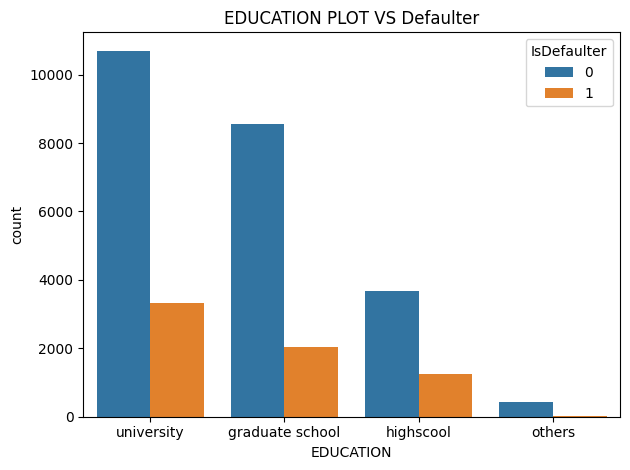

<Figure size 600x300 with 0 Axes>

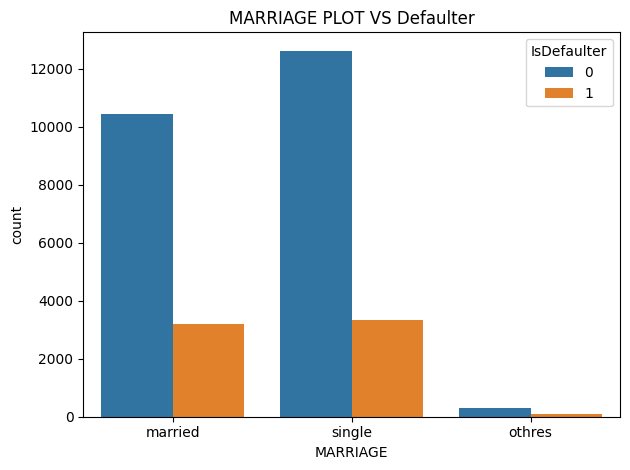

In [18]:
# graphical visualization
for  col in categorical_features:
    plt.figure(figsize = (6,3))
    fig  = plt.subplots(ncols = 1)
    sns.countplot(x = col , hue = 'IsDefaulter' , data = df_categorical)
    plt.title(f'{col} PLOT VS Defaulter')
    plt.tight_layout()

Observations from categorical features:


*  There are more females credit card holder, so no. of  defualter have high proportion from females.
*  Coming to Education, there are large no. of defaulter from university and graduate school.
*  Single persons contributing to large no. of defaulters.

In [19]:
#lets quickly analyze the limit_bal
df['LIMIT_BAL'].min() , df['LIMIT_BAL'].max()

(10000, 1000000)

In [20]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='Defaulter', ylabel='LIMIT_BAL'>

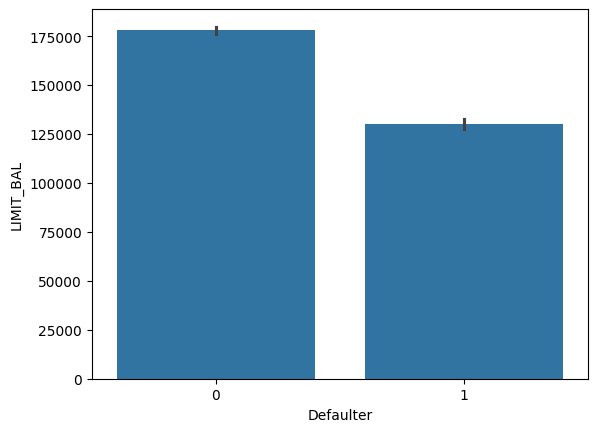

In [21]:
# viz of LIMIT_BAL vs. Defaulter
sns.barplot(x= 'Defaulter', y = 'LIMIT_BAL', data = df)

<Axes: xlabel='AGE', ylabel='Defaulter'>

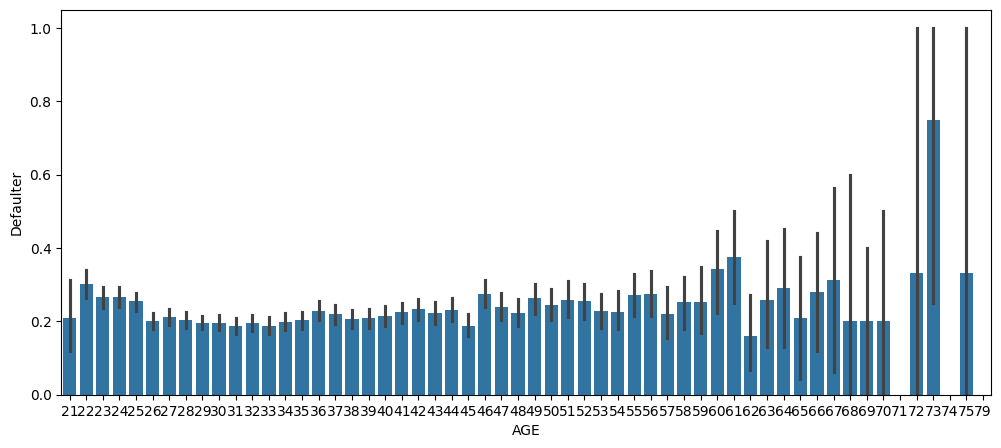

In [22]:
# VIZ. of AGE
plt.figure(figsize = (12,5))
sns.barplot(x = 'AGE', y = 'Defaulter', data = df)

**BILL_AMT VIZ.**

In [23]:
bill_amount_df = df[["BILL_AMT1" , "BILL_AMT2" , "BILL_AMT3" , "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]]

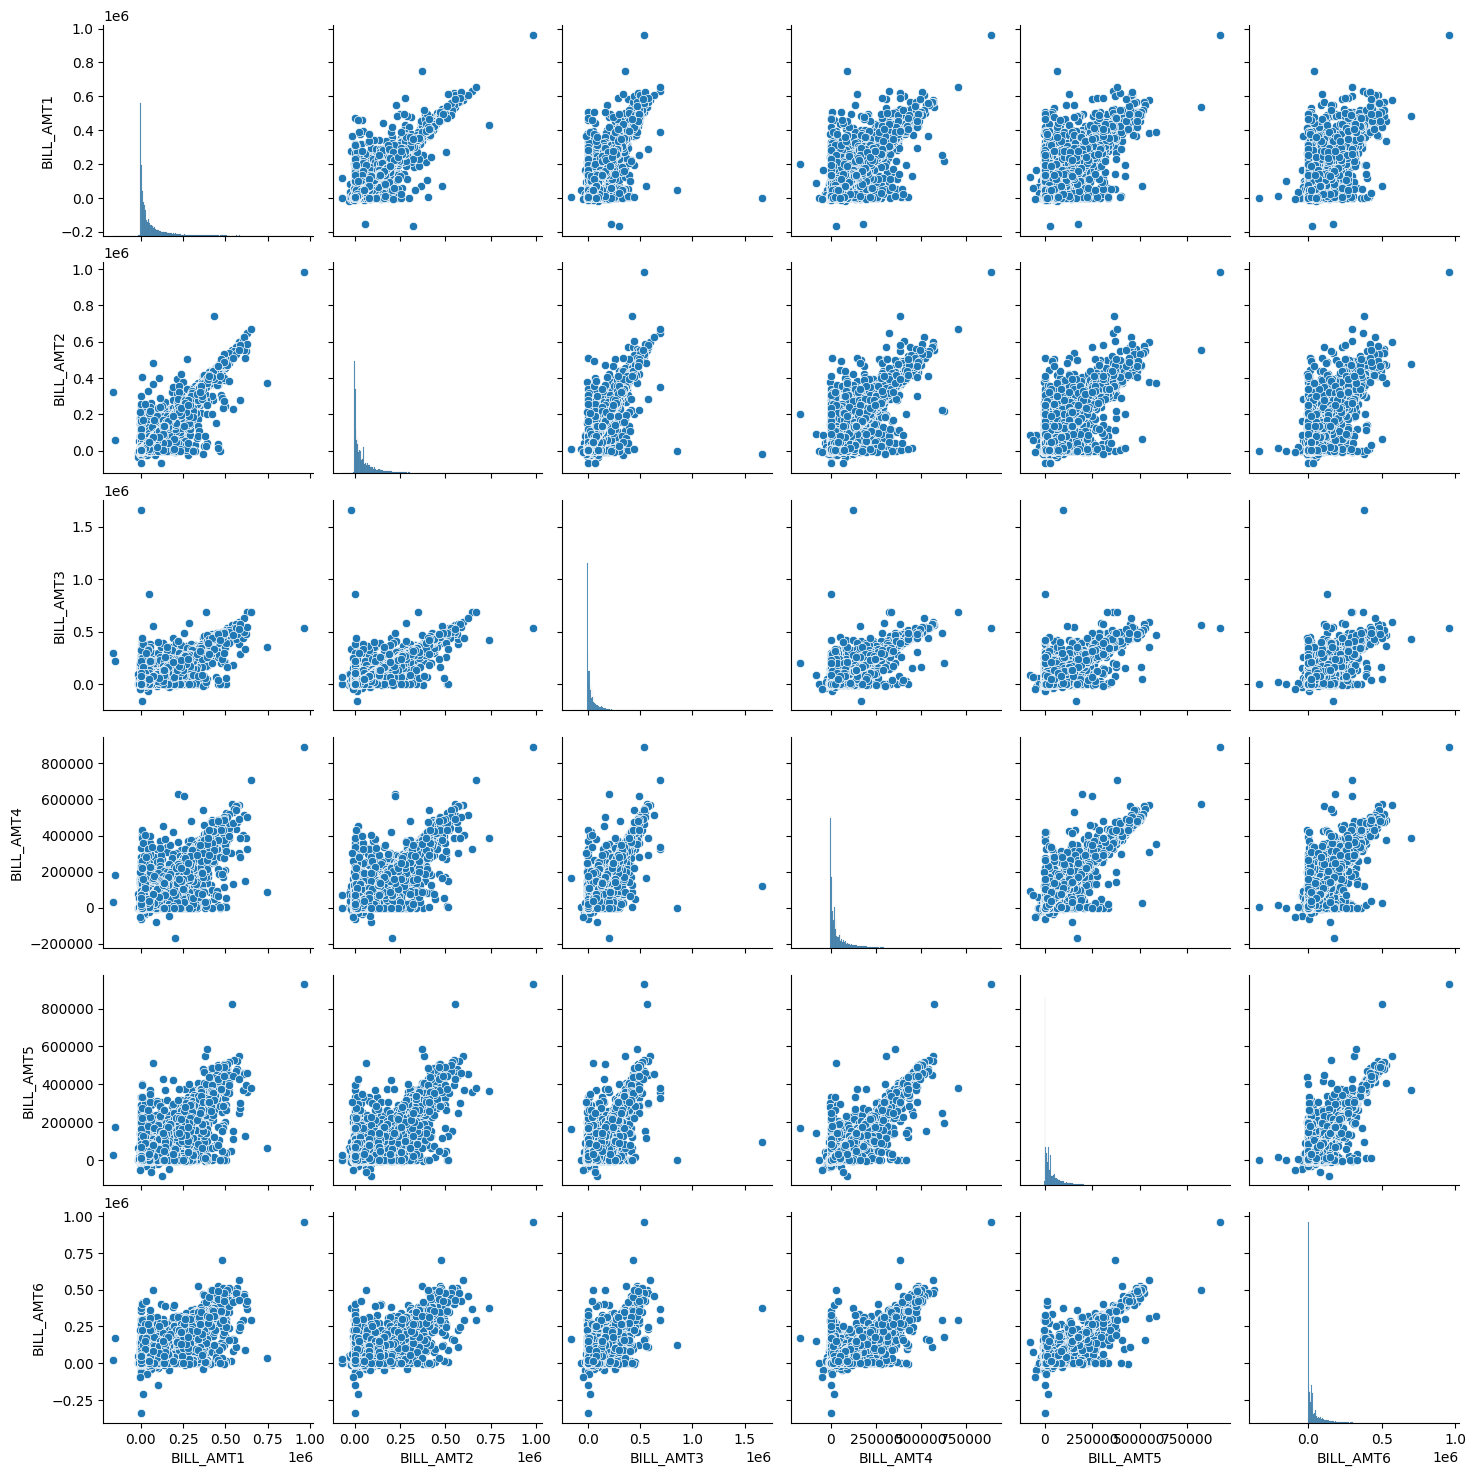

In [24]:
sns.pairplot(data = bill_amount_df) # bill amounts data spreadness.

**BILL_AMT data points are Scattered**

**Payment Status**

In [25]:
pay_col = ['PAY_0' , 'PAY_2' , 'PAY_3' , 'PAY_4' , 'PAY_5' , 'PAY_6']  # visualizing its count plot cuz pay_cols having values till 8,thatsy not checking pairplot

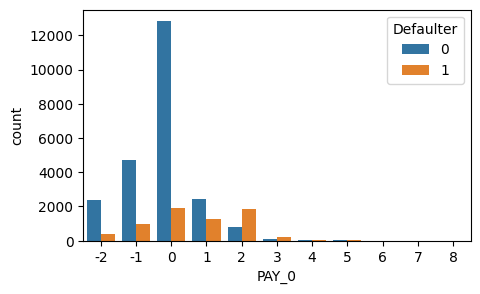

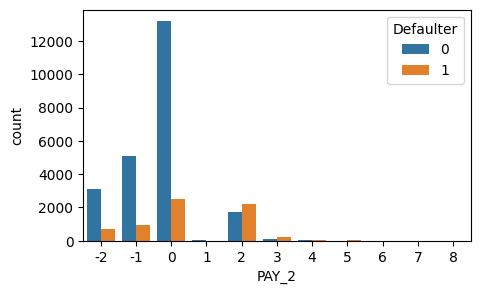

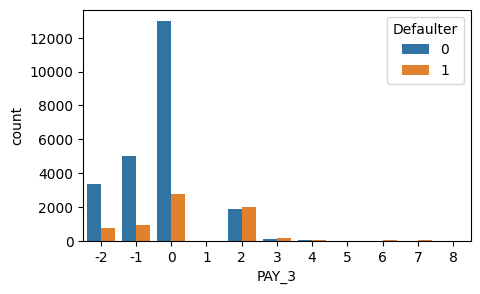

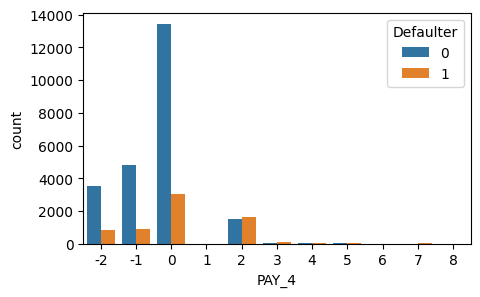

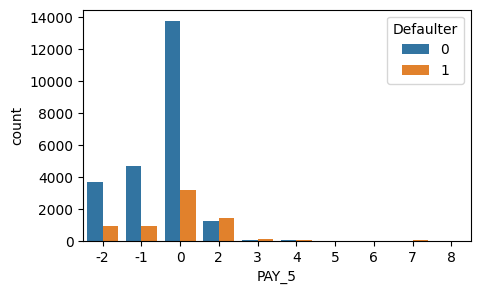

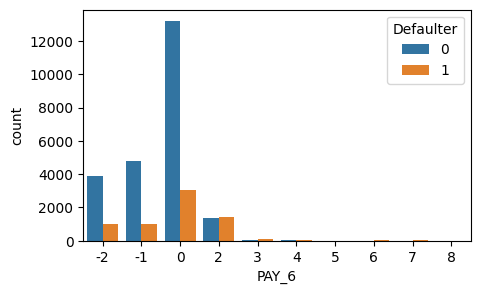

In [26]:
for col in pay_col:
    plt.figure(figsize = (5,3))
    sns.countplot(x = col , hue = 'Defaulter' , data = df)

**paid_amount**

In [27]:
paid_amt = df[['PAY_AMT1' , 'PAY_AMT2' , 'PAY_AMT3' , 'PAY_AMT4' , 'PAY_AMT5' , 'PAY_AMT6']]

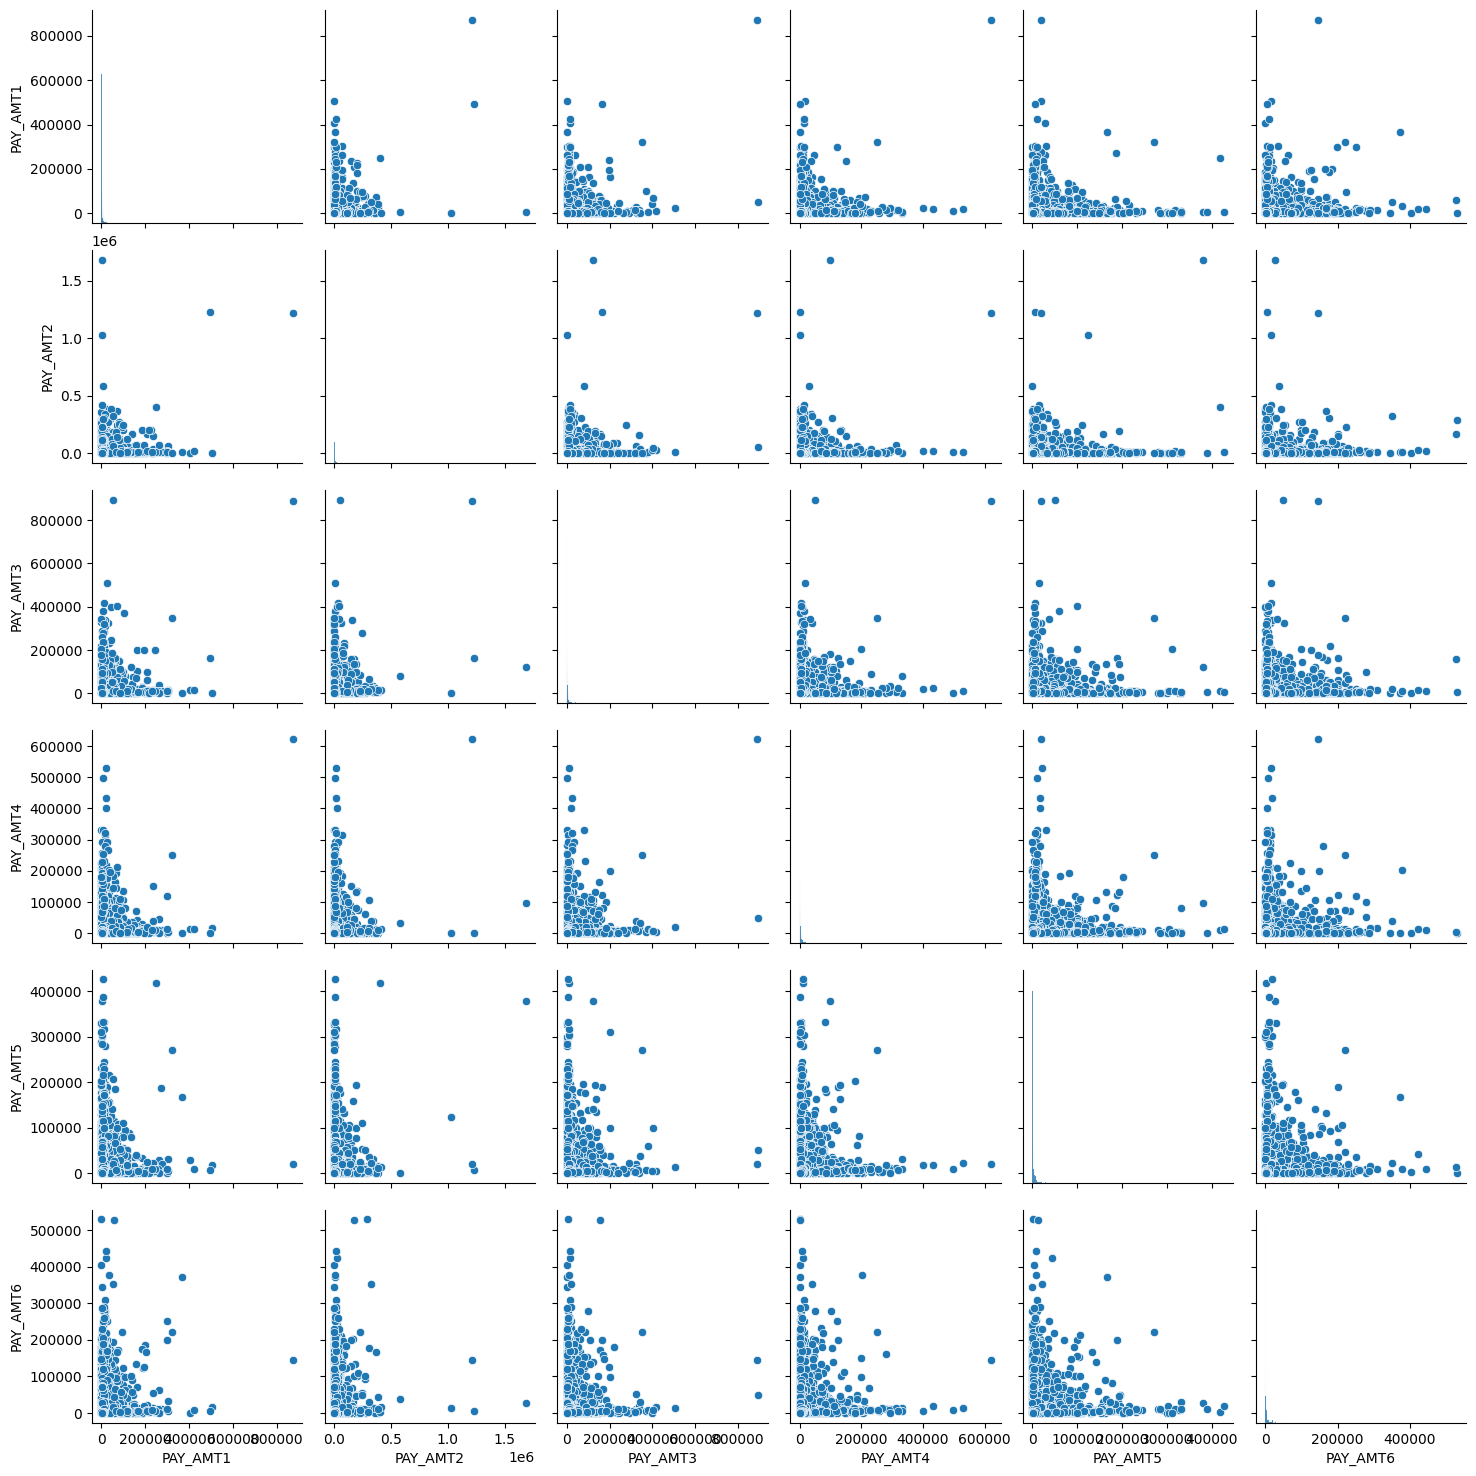

In [28]:
sns.pairplot(data = paid_amt)

**As we can see here also PAY_AMT is also scattered**

# Step 3: Data Cleaning

* Handle missing values
* Detect and treating Outliers.

In [29]:
# Checking any missing value
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
Defaulter                     0
dtype: int64

In [30]:
df.fillna(df.mean(), inplace=True) # filling by mean, if any na/nan value

**There is no null value in data.**

#### Detection and treatment of outliers by IQR method.

In [31]:
numerical_cols = df.drop(columns = ['SEX', 'EDUCATION', 'MARRIAGE'])

**Note : I have increased the lower limit by 2 and upper limit by 100 to get more no. of observations from original dataset.
If i dont do this, I get data '10235' after removing outliers , which is not recommended to go with.**

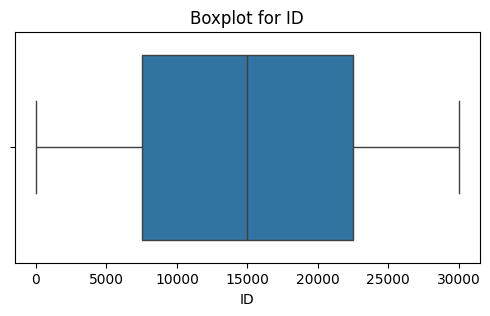

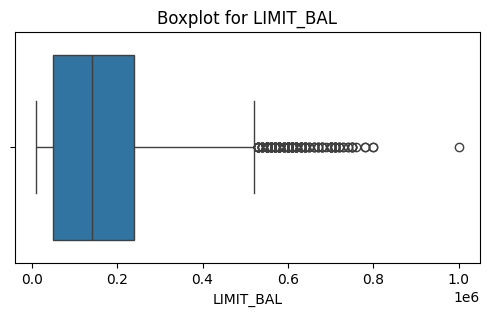

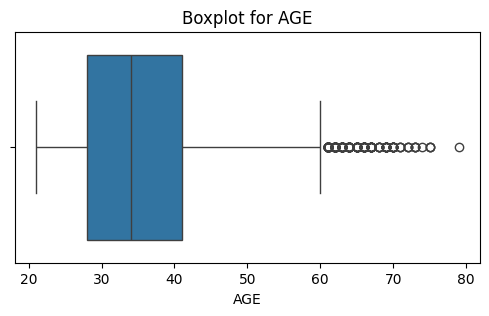

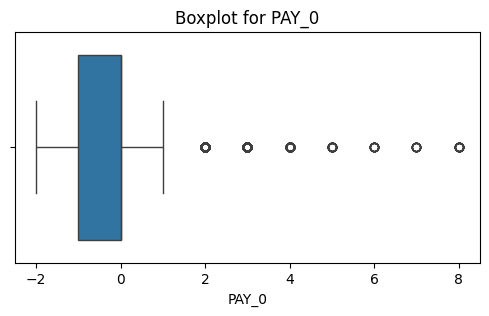

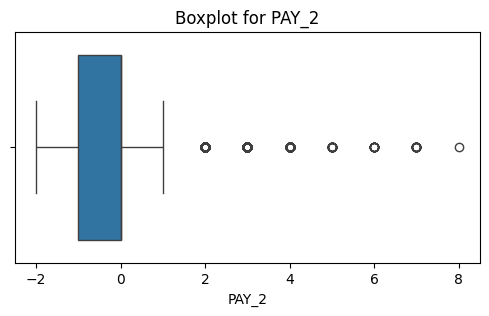

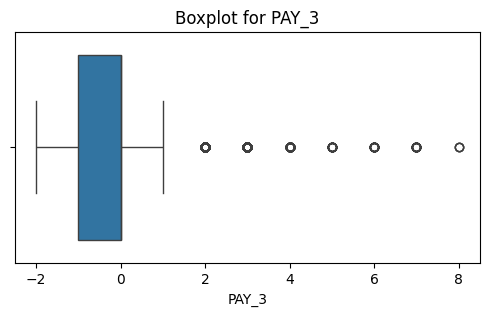

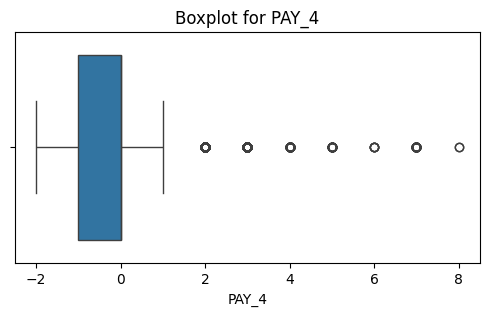

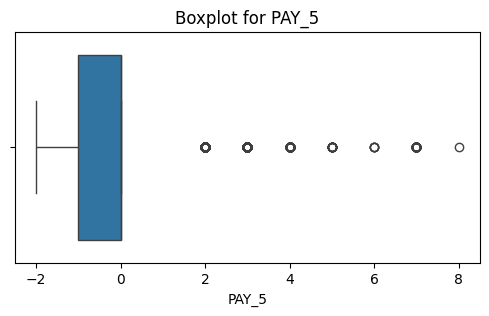

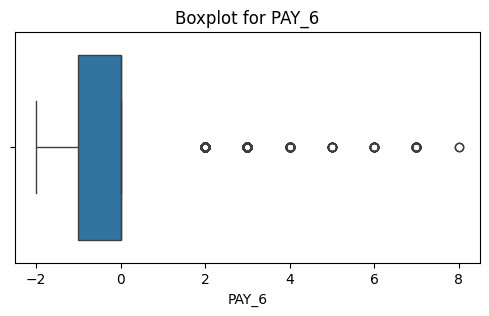

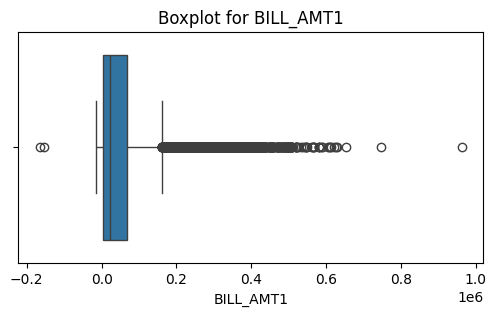

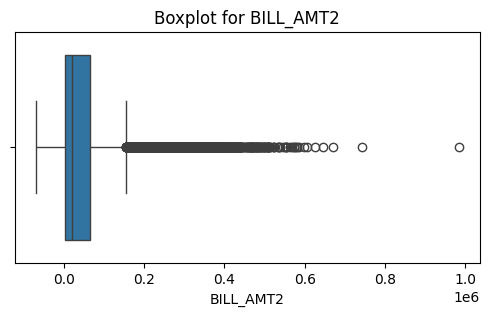

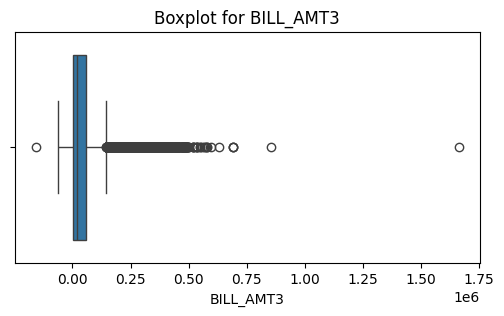

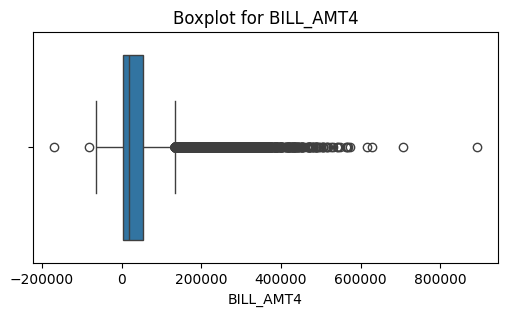

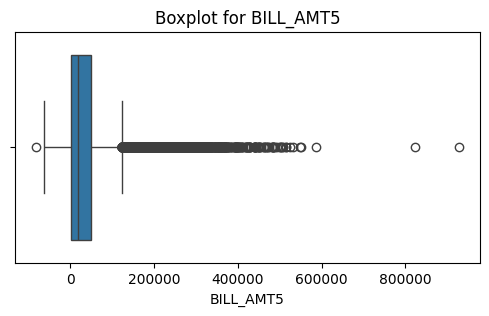

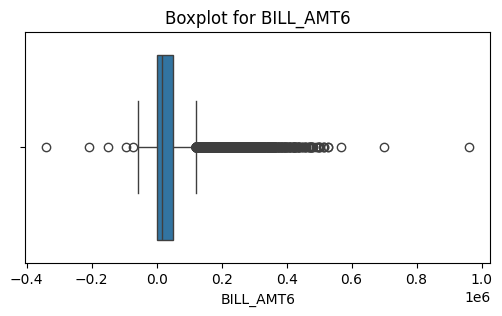

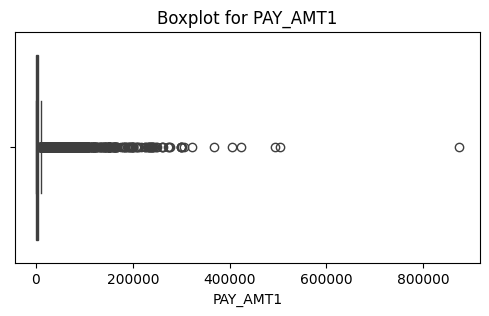

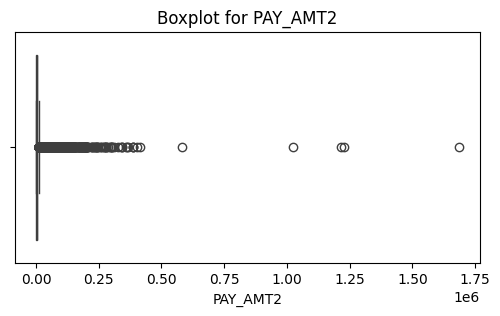

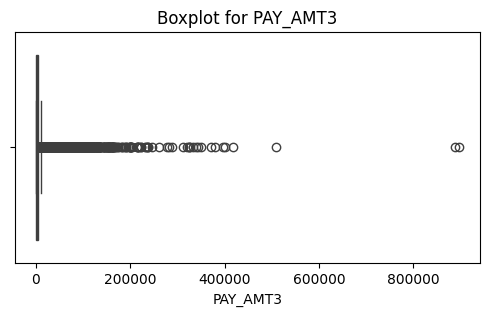

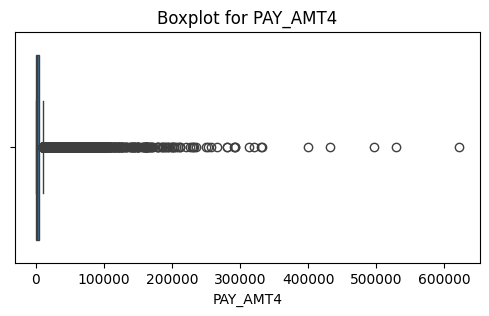

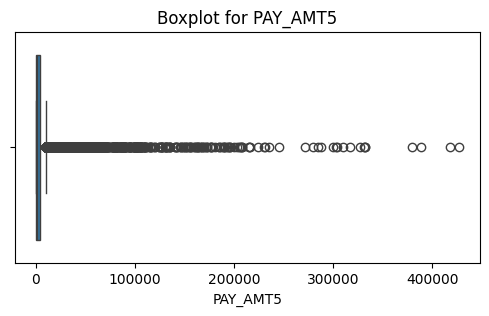

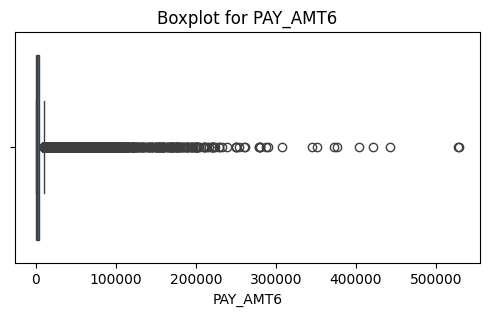

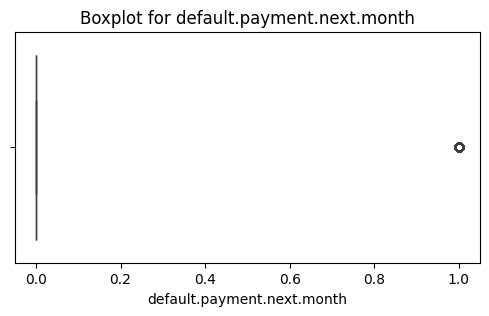

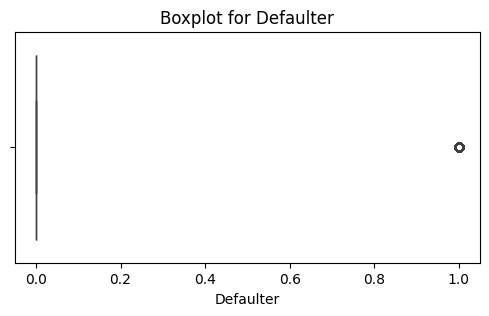

Shape of data after outlier treatment: (19765, 26)


In [99]:
# Visualize outliers using boxplots
for column in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot for {column}")
    plt.show()

# Removing outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


# Define bounds for non-outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

lower_fence1 = lower_fence - 2 # additional limits
upper_fence1 = upper_fence + 100 # additional limits

# Filter data to exclude outliers
no_outliers = df[~((df < lower_fence1) | (df > upper_fence1)).any(axis=1)]
print(f"Shape of data after outlier treatment: {no_outliers.shape}")

In [33]:
no_outliers.shape # 10235 outliers are treated

(19765, 26)

#### visualising the data after treatment of outliers

In [34]:
df_f = no_outliers.copy()

<Axes: xlabel='AGE', ylabel='Defaulter'>

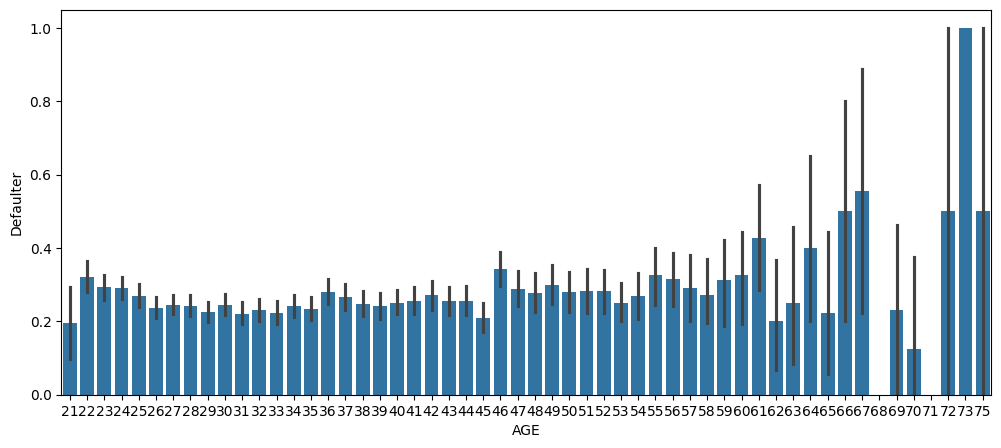

In [35]:
# VIZ. of AGE
plt.figure(figsize = (12,5))
sns.barplot(x = 'AGE', y = 'Defaulter', data = df_f)

In [36]:
bill_amount_df = df_f[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]]

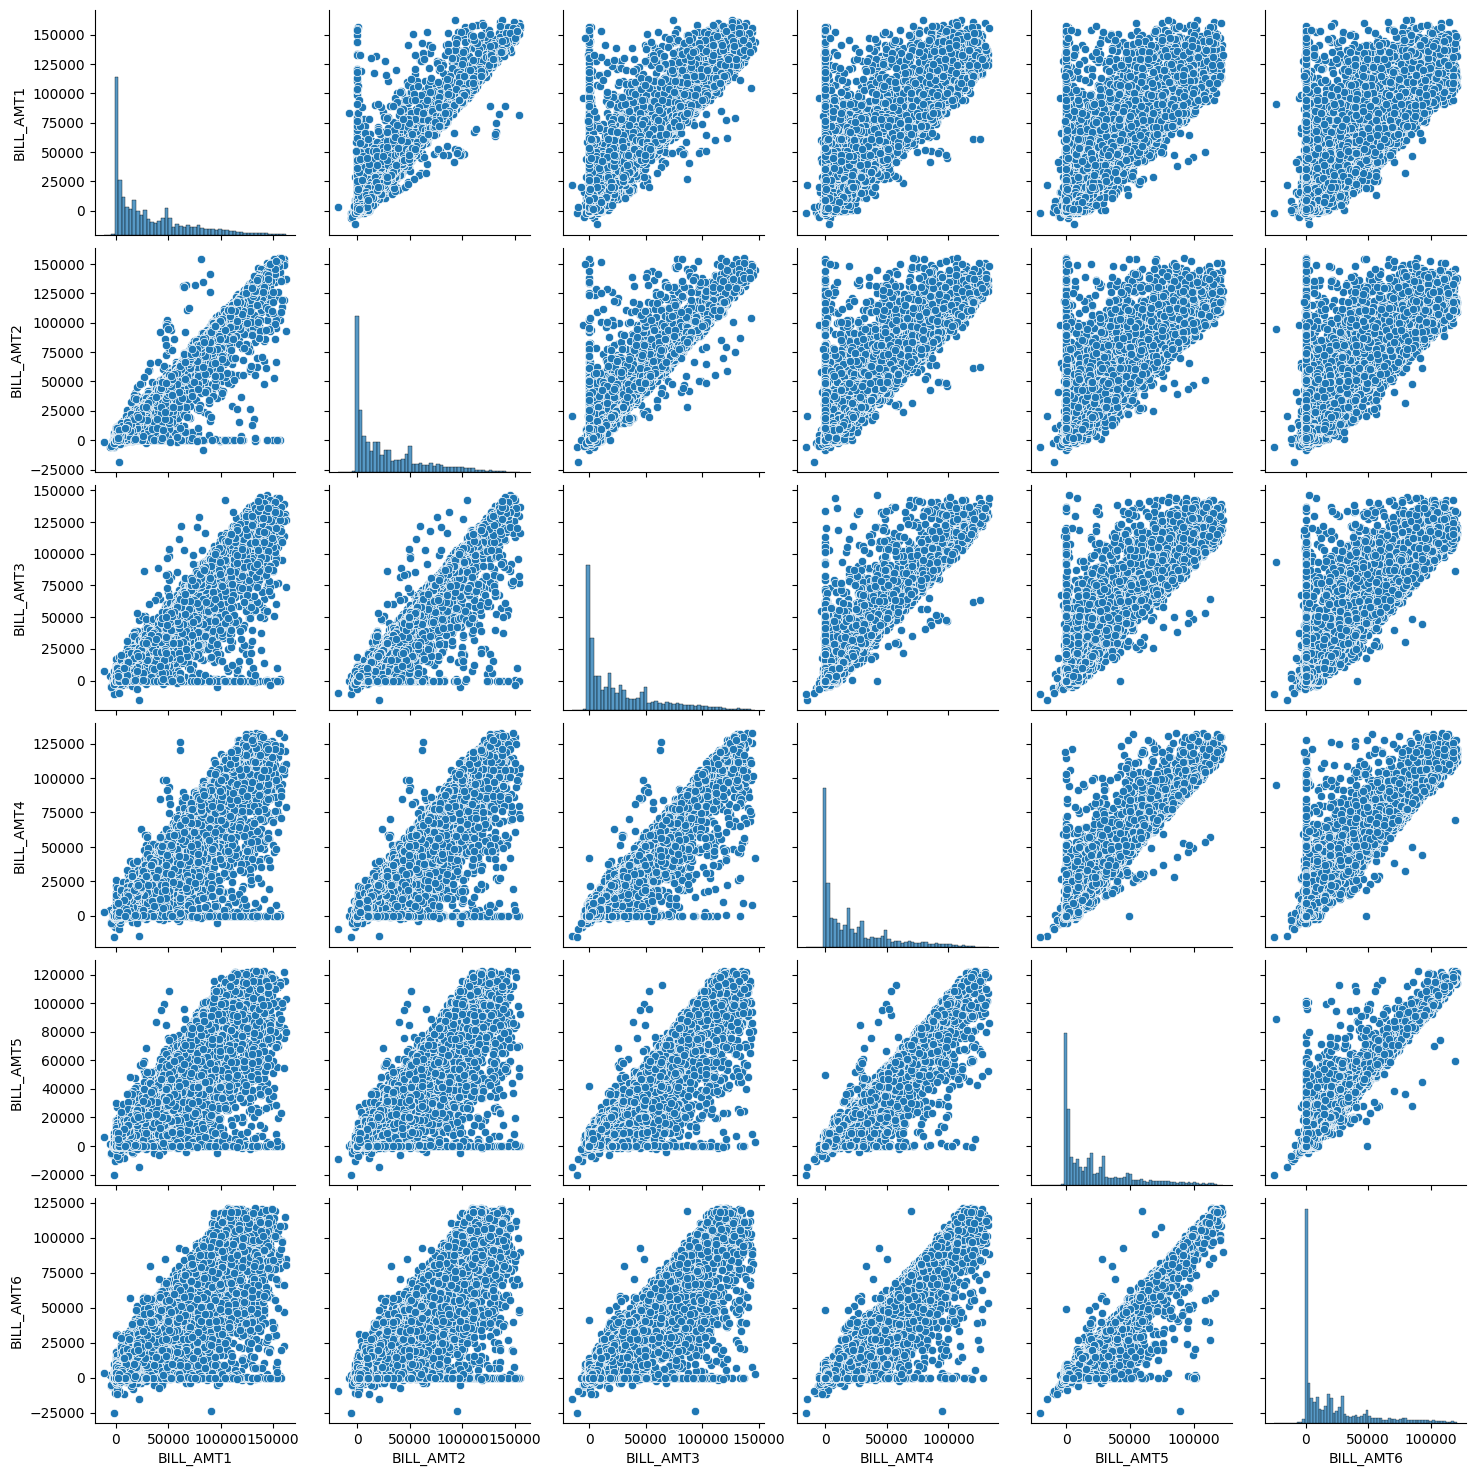

In [37]:
sns.pairplot(data = bill_amount_df) 

**Now data is not so scattered**

In [38]:
paid_amt = df_f[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

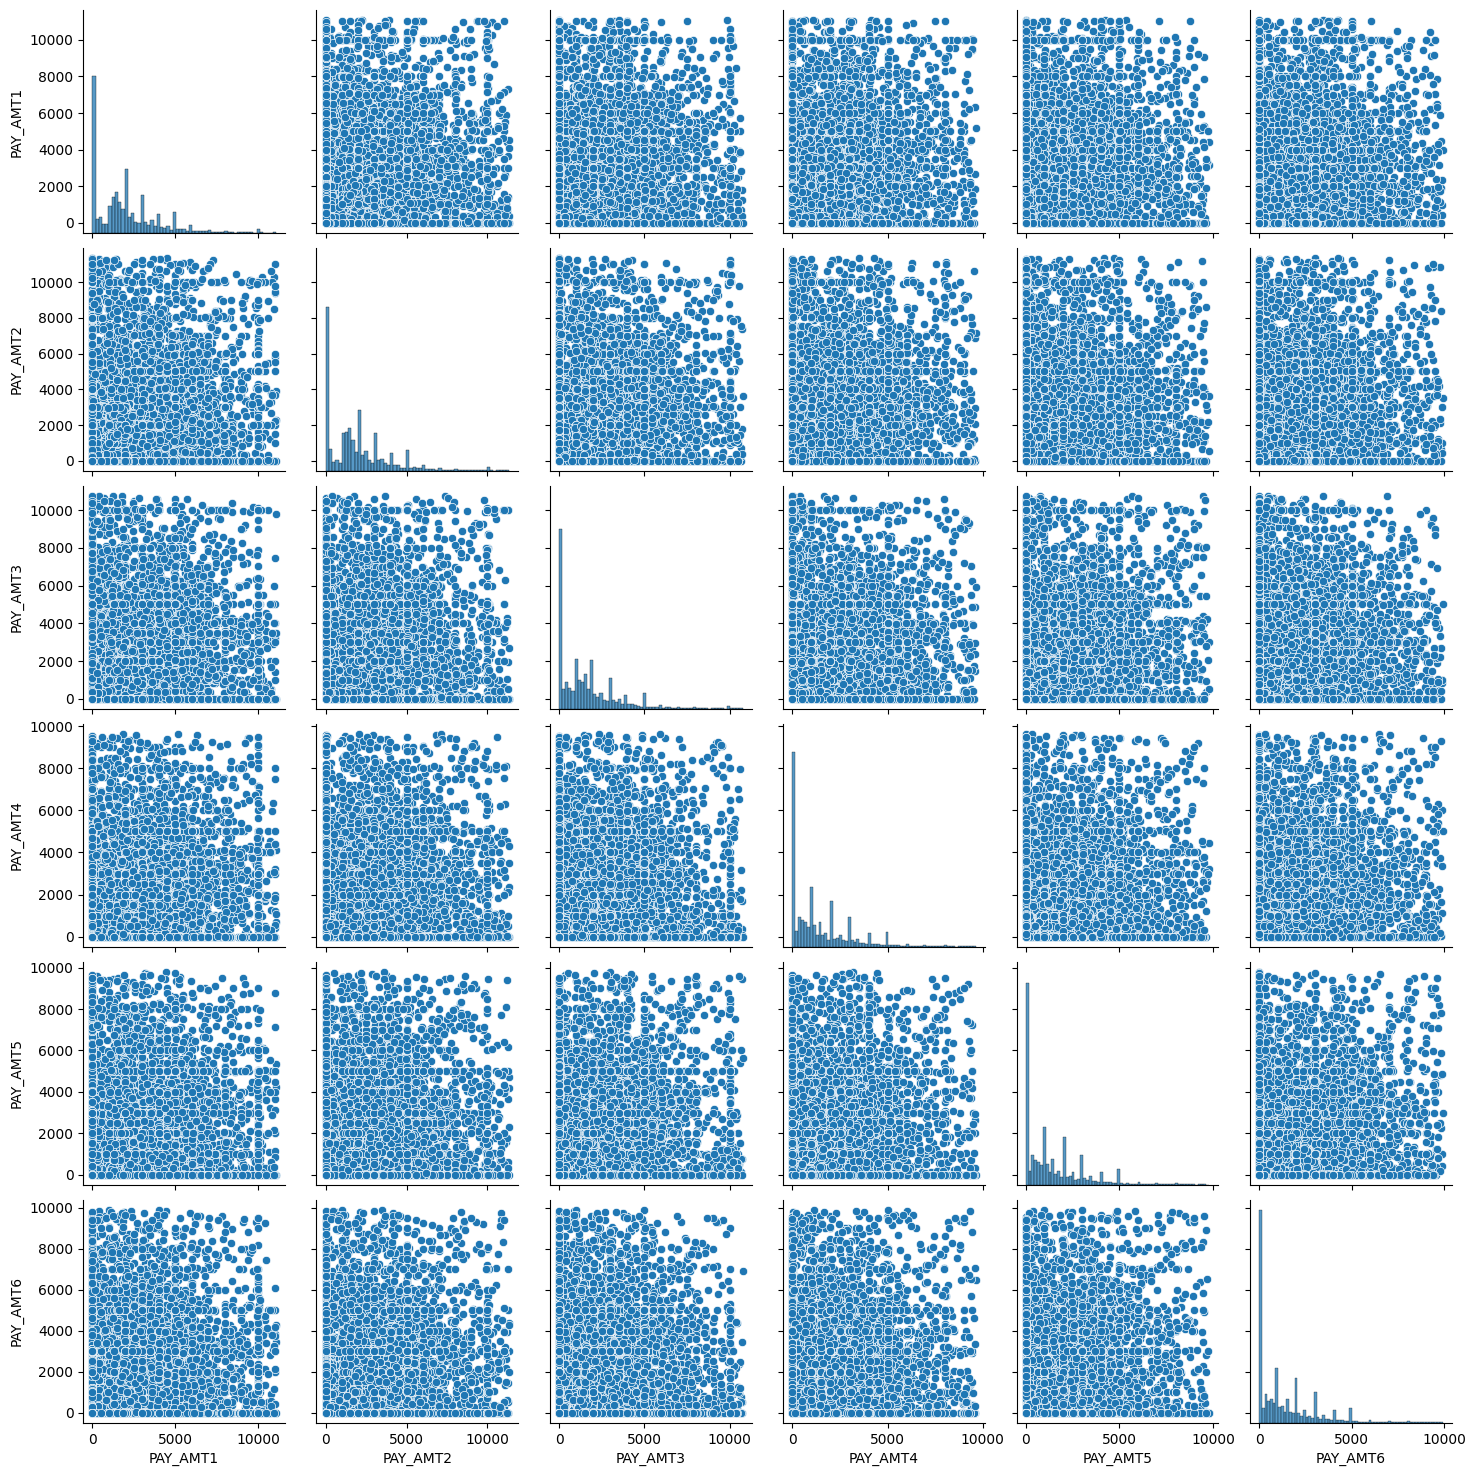

In [39]:
sns.pairplot(data = paid_amt)

**Now data is not so scattered here also**

## AS we have seen earlier that we have imbalanced dataset. 
## So to remediate Imbalance i am  using SMOTE(Synthetic Minority Oversampling Technique)

In [40]:
df_f['Defaulter'] = df_f['Defaulter'].astype(int)

# Resample the dataset.
smote = SMOTE() 
x_smote, y_smote =smote.fit_resample(df_f.iloc[:,0:-1], df_f['Defaulter'])

print('Original data:',len(df_f))
print('Resample data:',len(y_smote))

Original data: 19765
Resample data: 29312


# Step 4: Feature Engineering

In [41]:
df_final = df_f.copy()

In [42]:
# Combining all payment columns into single 'Payment_Value'
df_final['Payment_Value'] = df_final['PAY_0'] + df_final['PAY_2'] + df_final['PAY_3'] + df_final['PAY_4'] + df_final['PAY_5'] + df_final['PAY_6']

In [43]:
df_final.groupby('Defaulter')['Payment_Value'].mean()

Defaulter
0   -1.772653
1    2.243100
Name: Payment_Value, dtype: float64

In [44]:
# Calculating'Dues'
df_final['Dues'] = (df_final[['BILL_AMT1' , 'BILL_AMT2', 'BILL_AMT3' , 'BILL_AMT4' , 'BILL_AMT5' , 'BILL_AMT6']].sum(axis = 1)
- df_final[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3' ,'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis = 1))

In [45]:
df_final.groupby('Defaulter')['Dues'].mean()

Defaulter
0    146753.022858
1    140852.758857
Name: Dues, dtype: float64

In [46]:
df_final['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [47]:
df_final['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [48]:
df_final.replace({'SEX' :{1:'MALE' , 2:'FEMALE'} , 'EDUCATION' :{1:'graduate school' , 2:'university',3:'high school',4:'others'},
                'MARRIAGE' : {1: 'married' , 2 : 'single' , 3: 'others'}},inplace = True)

In [49]:
df_final.head()

ID  LIMIT_BAL     SEX        EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  FEMALE       university  married   24      2      2     -1   
1   2     120000  FEMALE       university   single   26     -1      2      0   
2   3      90000  FEMALE       university   single   34      0      0      0   
3   4      50000  FEMALE       university  married   37      0      0      0   
5   6      50000    MALE  graduate school   single   37      0      0      0   

   PAY_4  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     -1  ...       0.0     689.0       0.0       0.0       0.0       0.0   
1      0  ...       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2      0  ...    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3      0  ...    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
5      0  ...    2500.0    1815.0     657.0    1000.0    1000.0     800.0   

   default.payment.next.month  Defaulter  Payment_Value      Dues  
0                           1          1             -2    7015.0  
1                           1          1              3   12077.0  
2                           0          0              0   90635.0  
3                           0          0              0  222946.0  
5                           0          0              0  230342.0  

[5 rows x 28 columns]

**dropping unusable features : 'ID' and 'default.payment.next.month'**

In [50]:
del df_final['ID']
del df_final['default.payment.next.month']

#### One hot Encoding

In [51]:
df_final = pd.get_dummies(df_final , columns = ['EDUCATION' , 'MARRIAGE'], dtype = int)

In [52]:
df_final.head()

LIMIT_BAL     SEX  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0      20000  FEMALE   24      2      2     -1     -1     -2     -2   
1     120000  FEMALE   26     -1      2      0      0      0      2   
2      90000  FEMALE   34      0      0      0      0      0      0   
3      50000  FEMALE   37      0      0      0      0      0      0   
5      50000    MALE   37      0      0      0      0      0      0   

   BILL_AMT1  ...  Defaulter  Payment_Value      Dues  \
0     3913.0  ...          1             -2    7015.0   
1     2682.0  ...          1              3   12077.0   
2    29239.0  ...          0              0   90635.0   
3    46990.0  ...          0              0  222946.0   
5    64400.0  ...          0              0  230342.0   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_others  \
0                          0                      0                 0   
1                          0                      0                 0   
2                          0                      0                 0   
3                          0                      0                 0   
5                          1                      0                 0   

   EDUCATION_university  MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  
0                     1                 1                0                0  
1                     1                 0                0                1  
2                     1                 0                0                1  
3                     1                 1                0                0  
5                     0                 0                0                1  

[5 rows x 31 columns]

In [53]:
# Dropping Education_other and MARRIAGE_others columns, not needed
df_final.drop(['EDUCATION_others' , 'MARRIAGE_others'], axis = 1 , inplace = True)

In [54]:
df_final = pd.get_dummies(df_final, columns = ['PAY_0' ,'PAY_2' , 'PAY_3' , 'PAY_4','PAY_5' , 'PAY_6']  , dtype = int ,drop_first = True)

In [55]:
# Lebel Encoding for 'SEX'. Label encoding is good to use if we have only classification like 'YES' or 'NO' etc.. that'swhy using label encoding
encoders_num = {"SEX" : {"FEMALE" : 0, "MALE" : 1}}
df_final = df_final.replace(encoders_num)

C:\Users\mqt\AppData\Local\Temp\ipykernel_6348\3470713034.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.replace(encoders_num)


In [56]:
df_final.head()

LIMIT_BAL  SEX  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      20000    0   24     3913.0     3102.0      689.0        0.0        0.0   
1     120000    0   26     2682.0     1725.0     2682.0     3272.0     3455.0   
2      90000    0   34    29239.0    14027.0    13559.0    14331.0    14948.0   
3      50000    0   37    46990.0    48233.0    49291.0    28314.0    28959.0   
5      50000    1   37    64400.0    57069.0    57608.0    19394.0    19619.0   

   BILL_AMT6  PAY_AMT1  ...  PAY_5_8  PAY_6_-1  PAY_6_0  PAY_6_2  PAY_6_3  \
0        0.0       0.0  ...        0         0        0        0        0   
1     3261.0       0.0  ...        0         0        0        1        0   
2    15549.0    1518.0  ...        0         0        1        0        0   
3    29547.0    2000.0  ...        0         0        1        0        0   
5    20024.0    2500.0  ...        0         0        1        0        0   

   PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0        0        0        0        0        0  
1        0        0        0        0        0  
2        0        0        0        0        0  
3        0        0        0        0        0  
5        0        0        0        0        0  

[5 rows x 80 columns]

## Seperating X Independent variables and Dependent variable Y 

In [57]:
X = df_final.drop(columns = ['Defaulter' , 'Payment_Value' ,'Dues'], axis = 1)

In [58]:
y = df_final["Defaulter"]

### Standardizing the features for equal contribution of each feature to model.

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting the data for training and testing purpose

In [60]:
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3 , random_state =42)

# Step 5: Various Models implementation


## 5.1 Logistic Regression

In [61]:
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

In [62]:
# Classes Prediction
y_pred_test_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

**Evaluating Model performance**

In [63]:
confusion_matrix(y_test, y_pred_test_lr)

array([[4144,  268],
       [ 961,  557]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4412
           1       0.68      0.37      0.48      1518

    accuracy                           0.79      5930
   macro avg       0.74      0.65      0.67      5930
weighted avg       0.78      0.79      0.77      5930



In [65]:
print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     10244
           1       0.69      0.38      0.49      3591

    accuracy                           0.79     13835
   macro avg       0.75      0.66      0.68     13835
weighted avg       0.78      0.79      0.77     13835



In [66]:
lr_accuracy_score = accuracy_score(y_test, y_pred_test_lr)
lr_precision_score = precision_score(y_test, y_pred_test_lr)
lr_recall_score = recall_score(y_test, y_pred_test_lr)
lr_f1score = f1_score(y_test, y_pred_test_lr)
lr_roc_score = roc_auc_score(y_test, y_pred_test_lr)

#### ROC-Curve for LogisticRegresision

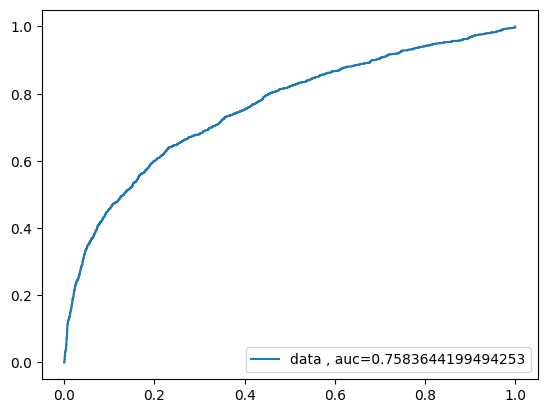

In [67]:
#predicting Probability
y_prob_lr = lr.predict_proba(X_test)[::,1]  # :: selects all rows and 1 selects the second column of the probabilities, which corresponds to the probability of the positive class (class 1).

fpr , tpr , _ = roc_curve(y_test , y_prob_lr)
auc = roc_auc_score(y_test , y_prob_lr)
plt.plot(fpr , tpr, label = "data , auc="+str(auc))
plt.legend(loc =4)
plt.show()

## 5.2. Decision Tree CLassifier with Hyper parameter Tunning

In [68]:
param_griddtc = {'max_depth':[3,5,10,20],
                'min_samples_split':[2,4,6,10]}

In [69]:
grid_dtc = GridSearchCV(DecisionTreeClassifier() , param_griddtc ,n_jobs = -1, cv = 3)
grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_split': [2, 4, 6, 10]})

In [70]:
grid_dtc.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [71]:
grid_dtc.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [72]:
y_pred_test_dtc = grid_dtc.predict(X_test)
y_pred_train_dtc = grid_dtc.predict(X_train)

In [73]:
print(classification_report(y_test , y_pred_test_dtc))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4412
           1       0.72      0.31      0.43      1518

    accuracy                           0.79      5930
   macro avg       0.76      0.63      0.65      5930
weighted avg       0.78      0.79      0.76      5930



In [74]:
print(classification_report(y_train, y_pred_train_dtc))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10244
           1       0.73      0.32      0.44      3591

    accuracy                           0.79     13835
   macro avg       0.76      0.64      0.66     13835
weighted avg       0.78      0.79      0.76     13835



In [75]:
dtc_accuracy_score = accuracy_score(y_test , y_pred_test_dtc)
dtc_precision_score = precision_score(y_test , y_pred_test_dtc)
dtc_recall_score = recall_score(y_test , y_pred_test_dtc)
dtc_f1_score = f1_score(y_test , y_pred_test_dtc)
dtc_roc_score = roc_auc_score(y_test , y_pred_test_dtc)

## 5.3: RandomForest HyperParameter tunning 

In [76]:
param_grid_rf = {'n_estimators':[100,200,300],
               'max_depth':[3,5,7,10],
                'min_samples_split':[3,4,6,8,10]}   # can remove this cuz not giving the good results 

In [77]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring = 'accuracy', n_jobs = -1, cv =3)
rf_grid.fit(X_train , y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [3, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [78]:
rf_grid.best_score_

0.792555200496268

In [79]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_split=6)

In [80]:
optimised_rf = rf_grid.best_estimator_

In [81]:
y_pred_test_grf = optimised_rf.predict(X_test)
y_pred_train_grf = optimised_rf.predict(X_train)

In [82]:
print(classification_report(y_test, y_pred_test_grf))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4412
           1       0.66      0.35      0.45      1518

    accuracy                           0.79      5930
   macro avg       0.73      0.64      0.66      5930
weighted avg       0.77      0.79      0.76      5930



In [83]:
print(classification_report(y_train, y_pred_train_grf))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     10244
           1       0.74      0.39      0.51      3591

    accuracy                           0.81     13835
   macro avg       0.78      0.67      0.70     13835
weighted avg       0.80      0.81      0.78     13835



In [84]:
rfg_accuracy_score = accuracy_score(y_test, y_pred_test_grf)
rfg_precision_score = precision_score(y_test, y_pred_test_grf)
rfg_recall_score = recall_score(y_test, y_pred_test_grf)
rfg_f1_score = f1_score(y_test, y_pred_test_grf)
rfg_roc_score = roc_auc_score(y_test, y_pred_test_grf)

**ROC-Curve for Random Forest tree**

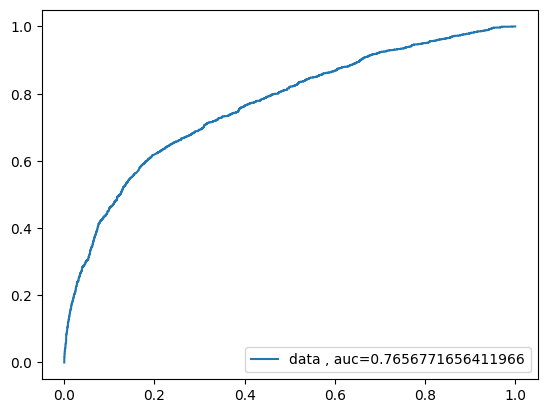

In [85]:
#predicting Probability
y_prob_rf = optimised_rf.predict_proba(X_test)[::,1]

fpr , tpr , _ = roc_curve(y_test , y_prob_rf)
auc = roc_auc_score(y_test , y_prob_rf)
plt.plot(fpr , tpr, label = "data , auc="+str(auc))
plt.legend(loc =4)
plt.show()

## 5.4 GradientBoostingClassifier : Ensemble technique

In [86]:
gbc = GradientBoostingClassifier(learning_rate = 0.02,n_estimators =500,max_depth=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=500)

In [87]:
y_pred_test_gbc = gbc.predict(X_test)
y_pred_train_gbc = gbc.predict(X_train)

In [88]:
print(classification_report(y_test, y_pred_test_gbc))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4412
           1       0.69      0.33      0.45      1518

    accuracy                           0.79      5930
   macro avg       0.75      0.64      0.66      5930
weighted avg       0.78      0.79      0.76      5930



In [89]:
print(classification_report(y_train,y_pred_train_gbc))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10244
           1       0.70      0.34      0.46      3591

    accuracy                           0.79     13835
   macro avg       0.75      0.65      0.67     13835
weighted avg       0.78      0.79      0.76     13835



In [90]:
gbc_accuracy_score = accuracy_score(y_test, y_pred_test_gbc)
gbc_precision_score = precision_score(y_test, y_pred_test_gbc)
gbc_recall_score = recall_score(y_test, y_pred_test_gbc)
gbc_f1_score = f1_score(y_test, y_pred_test_gbc)
gbc_roc_score = roc_auc_score(y_test, y_pred_test_gbc)

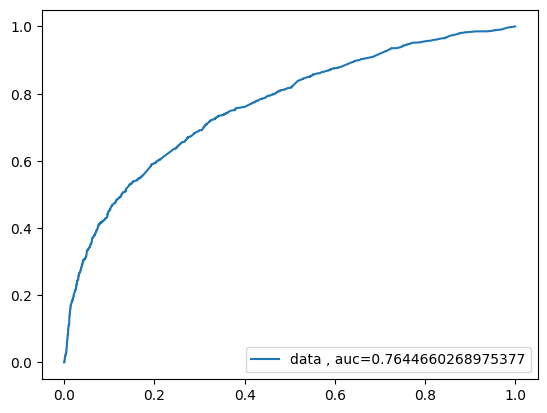

In [91]:
#predicting Probability
y_prob_gbc = gbc.predict_proba(X_test)[::,1]

fpr , tpr , _ = roc_curve(y_test , y_prob_gbc)
auc = roc_auc_score(y_test , y_prob_gbc)
plt.plot(fpr , tpr, label = "data , auc="+str(auc))
plt.legend(loc =4)
plt.show()

## 5.5: SVM : SVC(Support Vector Classifier)

In [92]:
svc = SVC() # takes 10 sec to execute
svc.fit(X_train,y_train)

SVC()

In [93]:
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)

In [94]:
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4412
           1       0.67      0.35      0.46      1518

    accuracy                           0.79      5930
   macro avg       0.74      0.65      0.67      5930
weighted avg       0.77      0.79      0.77      5930



In [95]:
print(classification_report(y_train, y_pred_train_svc))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     10244
           1       0.73      0.39      0.51      3591

    accuracy                           0.80     13835
   macro avg       0.77      0.67      0.69     13835
weighted avg       0.79      0.80      0.78     13835



In [96]:
svc_accuracy_score = accuracy_score(y_test, y_pred_test_svc)
svc_precision_score = precision_score(y_test, y_pred_test_svc)
svc_recall_score = recall_score(y_test, y_pred_test_svc)
svc_f1_score = f1_score(y_test, y_pred_test_svc)
svc_roc_score = roc_auc_score(y_test, y_pred_test_svc)

In [97]:
classifiers = ['Logistic Regression' , 'Decision tree clf_Tunned', 'Random Forest clf_Tunned' , 'GradientBoosting clf' ,'SVC']

accuracy = [lr_accuracy_score  , dtc_accuracy_score , rfg_accuracy_score , gbc_accuracy_score ,svc_accuracy_score]

precision = [lr_precision_score , dtc_precision_score, rfg_precision_score, gbc_precision_score, svc_precision_score]

recall_scr = [lr_recall_score , dtc_recall_score , rfg_recall_score , gbc_recall_score, svc_recall_score]

f1_score = [lr_recall_score, dtc_recall_score, rfg_recall_score, gbc_recall_score, svc_recall_score]

roc_score = [lr_roc_score, dtc_roc_score, rfg_roc_score, gbc_roc_score, svc_roc_score]

In [98]:
pd.DataFrame({'Classifier': classifiers , 'Accuracy': accuracy,'Precision': precision, 'Recall':recall_scr, 'f1_score': f1_score, 'ROC-Score':roc_score})

Classifier  Accuracy  Precision    Recall  f1_score  \
0       Logistic Regression  0.792749   0.675152  0.366930  0.366930   
1  Decision tree clf_Tunned  0.791737   0.716692  0.308300  0.308300   
2  Random Forest clf_Tunned  0.786678   0.657928  0.347167  0.347167   
3      GradientBoosting clf  0.791062   0.691358  0.332016  0.332016   
4                       SVC  0.789882   0.669154  0.354414  0.354414   

   ROC-Score  
0   0.653093  
1   0.633185  
2   0.642532  
3   0.640509  
4   0.647062

## Best Model:
Based on the results:

* Gradient Boosting Classifier is the best choice for this problem, because it is providing a good balance between precision, recall, and ROC-AUC. It has:
* High Precision: Avoids classifying too many non-defaulters as defaulters.
* Relatively High Recall: Captures more defaulters than Logistic Regression or Decision Tree.
* Strong ROC-AUC: Indicates good separability of classes.


## Why Gradient Boosting?


1. Credit default prediction often involves imbalanced datasets where identifying defaulters is critical.
2. Gradient Boostingâ€™s slightly higher recall ensures fewer defaulters are missed, making it more suitable for this context.
3. A high ROC-AUC score suggests it distinguishes well between defaulters and non-defaulters.